# Neural Network Workshop -- School of AI Algiers 
This workshop was done in the second event of School of AI Algiers. We describe here the process of neural netwoks and build a simple neural network from scratch using numpy and then use tensorflow to build a neural network and see the advantages of a framework. 

Here's What we're going to do : 

1. Check your knowledge 
    1. Understand the philosophy behind machine leanring 
    2. Supervised VS Unsupervised 
    3. Classification
    4. Regression  
    5. Scores and Accuracy 
    
2. Neural Networks
    1. How to obtain non linearity ? 
        1. Feature crosses 
        2. Neural Networks ! 
    2. Logistic regression 
    3. Activation functions  
    4. What's FeedForward ?
    5. What's Backpropagation ? 
    6. Let's Implement a 3-layer Neural Networks 
    7. Test different numbers of neurons if the hidden layer
3. Tensorflow ?  
    1. Colab 

6. Challenge !!! Let's light up the world 

![](Images/what-if-i-told-you-neural-network-can-help-you.jpg)


# Check your knowledge ! 

## Machine learning ! 

Rather than giving clear instructions to compute our problems, machine learning is giving the computers a set of examples to learn by itself how the world works. 

![](Images/sized.png)

It is important to remember that ML is not a solution for every type of problem. There are certain cases where robust solutions can be developed without using ML techniques. For example, you don’t need ML if you can determine a target value by using simple rules, computations, or predetermined steps that can be programmed without needing any data-driven learning.


*** 

## Supervised or Unsupervised 
Let's check if you know what's supervised and unsupervised models are :p 

### Example 1 
An AI that is learning to identify pedestrians on a street is trained with 2 million short videos of street scenes from self-driving cars. Some of the videos contain no pedestrians at all while others have up to 25. A variety of learning algorithms are trained on the data with each having access to the correct answers. Each algorithm develops a variety of models to identify pedestrians in fast moving scenes. The algorithms are then tested against another set of data to evaluate accuracy and precision.

### Example 2 
An AI is learning to estimate investing risk. It is fed a large number of trades that real investors made and asked to estimate a risk/reward ratio for each trade based on company fundamentals, price and other factors such as volume. The estimated risk/reward ratio is then compared to the historical results of the trade at a variety of time intervals such as a day or a year.

### Example 3 
A highly developed AI that serves as a housekeeping robot develops a theory that there is usually dust under a sofa. Each week, the theory is confirmed as the robot often finds dust under sofas. Nobody explicitly tells the robot the theory is correct but it is able to develop confidence in it nonetheless.

### Example 4
A learner that possesses visual highly developed visual and speech recognition capabilities could watch a large number of television shows to learn about human behavior. For example, a learner might be able to build a model that detects when people are smiling based on correlation of facial patterns and words such as "what are you smiling about?"

## Classification 
## Regression 
#### Linear regression 


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib
import pandas as pd

matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

In [2]:
dataset = pd.read_csv('datasets/train.csv')
print(dataset)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          60       RL         85.0    1192

In [3]:
x = dataset['LotArea']
y = dataset['SalePrice']

In [4]:
actualx = x
x = (x - x.mean()) / x.std() 
x = np.c_[np.ones(x.shape[0]), x] # To help us get b * 1 + a * x 

alpha = 0.01 #Step size
iterations = 2000 #No. of iterations
m = y.size #No. of data points
np.random.seed(123) #Set the seed
theta = np.random.rand(2) #Pick some random values to start with
# theta[0] == b 
# theta[1] == a

def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = [] # To know that this value is decreasing 
    past_thetas = [theta] 
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y 
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs

past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

#Print the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 180921.20, 20960.38


![](Images/linear.jpg)

## Generalization 
Let's build some intuitive minds :p 
![](Images/GeneralizationA.png)

## Validation 
![](Images/validation.jpg)


## Scores 
### Classification Accuracy 
Classification Accuracy is great, but gives us the false sense of achieving high accuracy.
![](Images/Accuracy.jpg)
### Logarithmic Loss 
Logarithmic Loss or Log Loss, works by penalising the false classifications. It works well for multi-class classification.
![](log.jpg)
### Confusion Matrix 

|n = 200      | Predicted : YES | Predicted : NO |
|-------------|-----------------|----------------|
|Actual : YES |       50        |       60       |  
|Actual : NO  |       20        |       70       | 

1. True Positives : The cases in which we predicted YES and the actual output was also YES.
2. True Negatives : The cases in which we predicted NO and the actual output was NO.
3. False Positives : The cases in which we predicted YES and the actual output was NO.
4. False Negatives : The cases in which we predicted NO and the actual output was YES.

### F1 Score
![](Images/f1.jpg)
![](Images/precision.jpg)
![](Images/recall.jpg)

# Neural Networks ! 
Ok ! ready to dive in ? Now that you know what's a machine learning algorithm is, and how it is created we need to understand what's neural networks and why using neural networks ? 
Sometime the data that we work on is not linearly separable, we can't draw a straight line that separates the two classes. This means that linear classifiers, such as Logistic Regression, won't be able to fit the data unless you hand-engineer non-linear features (such as polynomials) that work well for the given dataset. 
So here we're searching some ways of bringing non linearity into our linear model, how can we do this ? 

## How to obtain non linearity ? 
### Feature crosses 

![](Images/LinearProblem2.png)
However if we use a model that is too complicated, such as one with too many crosses, we give it the opportunity to fit to the noise in the training data, often at the cost of making the model perform badly on test data.

### Neural networks 
Neural networks are a more sophisticated version of feature crosses. In essence, neural networks learn the appropriate feature crosses for you.

#### Neurons ? Brain ? Why ? 
![](Images/why.jpg)

#### But How ? More complex linear models ? 
In the model represented by the following graph, we've added a "hidden layer" of intermediary values. Each yellow node in the hidden layer is a weighted sum of the blue input node values. The output is a weighted sum of the yellow nodes.
![](Images/neural.jpg)

##### Activation functions 
###### Sigmoid 
![](Images/sigmoid.jpg)
![](Images/SigmoidFunction.png)
###### Relu 
![](Images/relu.jpg)
![](Images/relu2.jpg)
###### Tanh
![](Images/1200px-Hyperbolic_Tangent.svg.png)



Let's play with some data ! 

Now we can build our Neural Net. We know our network must have 2 inputs and 1 output, because these are the dimensions of our data. We’ll call our output y hat, because it’s an estimate of y, but not the same as y. Any layer between our input and output layer is called a hidden layer. Recently, researchers have built networks with many many hidden layers. These are known as a deep belief networks, giving rise to the term deep learning. Here, we’re going to use 1 hidden layer with 3 hidden units, but if we wanted to build a deep neural network, we would just stack a bunch of layers together.

![](Images/Deep-learning-ai-machine-matrix2.gif)

|Code Symbol | Math Symbol | Definition | Dimensions
| :-: | :-: | :-: | :-: |
|X|$$X$$|Input Data, each row in an example| (numExamples, inputLayerSize)|
|y |$$y$$|target data|(numExamples, outputLayerSize)|
|W1 | $$W^{(1)}$$ | Layer 1 weights | (inputLayerSize, hiddenLayerSize) |
|W2 | $$W^{(2)}$$ | Layer 2 weights | (hiddenLayerSize, outputLayerSize) |
|z2 | $$z^{(2)}$$ | Layer 2 activation | (numExamples, hiddenLayerSize) |
|a2 | $$a^{(2)}$$ | Layer 2 activity | (numExamples, hiddenLayerSize) |
|z3 | $$z^{(3)}$$ | Layer 3 activation | (numExamples, outputLayerSize) |

Our network has 2 inputs, 3 hidden units, and 2 output. These are examples of hyperparameters. Hyperparameters are constants that establish the structure and behavior of a neural network, but are not updated as we train the network. Our learning algorithm is not capable of, for example, deciding that it needs another hidden unit, this is something that WE must decide on before training. What a neural network does learn are parameters, specifically the weights on the synapses.

(200, 2) (200,)


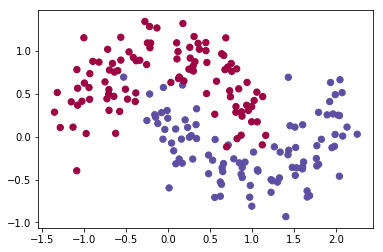

In [5]:
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
print(X.shape, y.shape)

#### Logistic regression 
To better compare between Neural networks and a linear models we're going to use a classifier model called Logistic regression. Many problems require a probability estimate as output. Logistic regression is an extremely efficient mechanism for calculating probabilities. 

1. logistic regression is extremely efficient.
2. Very fast training and prediction times.
3. Short / wide models use a lot of RAM.

Logistic regression uses the sigmoid function to obtain a value between 0 and 1 which is the probability of having an example in a class X. 

Suppose we had a logistic regression model with three features that learned the following bias and weights:

* b = 1
* w1 = 2
* w2 = -1
* w3 = 5 

Further suppose the following feature values for a given example:

* x1 = 0
* x2 = 10
* x3 = 2

What is the probability of having this example in the class A ? 


In [6]:
def plot_decision_boundary(pred_func):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.001
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.tab20c)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Greys)

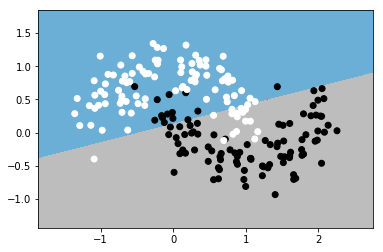

In [7]:
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X, y)
 
# Plot the decision boundary
plot_decision_boundary(lambda x: clf.predict(x))

In [8]:
num_examples = len(X) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality

epsilon = 0.01 
reg_lambda = 0.01 # regularization strength

#### Softmax 
![](Images/softmax.jpg) 

In [9]:
def softmax(z):
    exp_scores = np.exp(z)
    return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

In [10]:
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    
    # Forward propagation to calculate our predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    probs = softmax(z2)
    
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    
    
    return 1./num_examples * data_loss


In [11]:
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    probs = softmax(z2)
    
    return np.argmax(probs, axis=1)

In [12]:
def build_model(nn_hdim, num_passes=20000):
    
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))

    # This is what we return at the end
    model = {}
    
    # Gradient descent. For each batch...
    for i in range(0, num_passes):

        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        probs = softmax(z2)

        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if i % 1000 == 0:
          print("Loss after iteration %i: %f" %(i, calculate_loss(model)))
    
    return model

Loss after iteration 0: 0.432166
Loss after iteration 1000: 0.065788
Loss after iteration 2000: 0.065447
Loss after iteration 3000: 0.067683
Loss after iteration 4000: 0.067673
Loss after iteration 5000: 0.067673
Loss after iteration 6000: 0.067675
Loss after iteration 7000: 0.067676
Loss after iteration 8000: 0.067677
Loss after iteration 9000: 0.067678
Loss after iteration 10000: 0.067679
Loss after iteration 11000: 0.067679
Loss after iteration 12000: 0.067679
Loss after iteration 13000: 0.067679
Loss after iteration 14000: 0.067680
Loss after iteration 15000: 0.067680
Loss after iteration 16000: 0.067680
Loss after iteration 17000: 0.067680
Loss after iteration 18000: 0.067680
Loss after iteration 19000: 0.067680


Text(0.5,1,'Decision Boundary for hidden layer size 3')

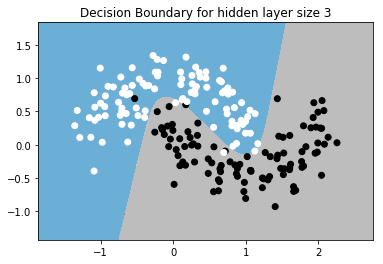

In [13]:
model = build_model(3)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")

Loss after iteration 0: 0.567091
Loss after iteration 1000: 0.333188
Loss after iteration 2000: 0.333188
Loss after iteration 3000: 0.333188
Loss after iteration 4000: 0.333188
Loss after iteration 5000: 0.333188
Loss after iteration 6000: 0.333188
Loss after iteration 7000: 0.333188
Loss after iteration 8000: 0.333188
Loss after iteration 9000: 0.333188
Loss after iteration 10000: 0.333188
Loss after iteration 11000: 0.333188
Loss after iteration 12000: 0.333188
Loss after iteration 13000: 0.333188
Loss after iteration 14000: 0.333188
Loss after iteration 15000: 0.333188
Loss after iteration 16000: 0.333188
Loss after iteration 17000: 0.333188
Loss after iteration 18000: 0.333188
Loss after iteration 19000: 0.333188
Loss after iteration 0: 0.546403
Loss after iteration 1000: 0.318716
Loss after iteration 2000: 0.315558
Loss after iteration 3000: 0.316430
Loss after iteration 4000: 0.315528
Loss after iteration 5000: 0.316654
Loss after iteration 6000: 0.332370
Loss after iteration 700

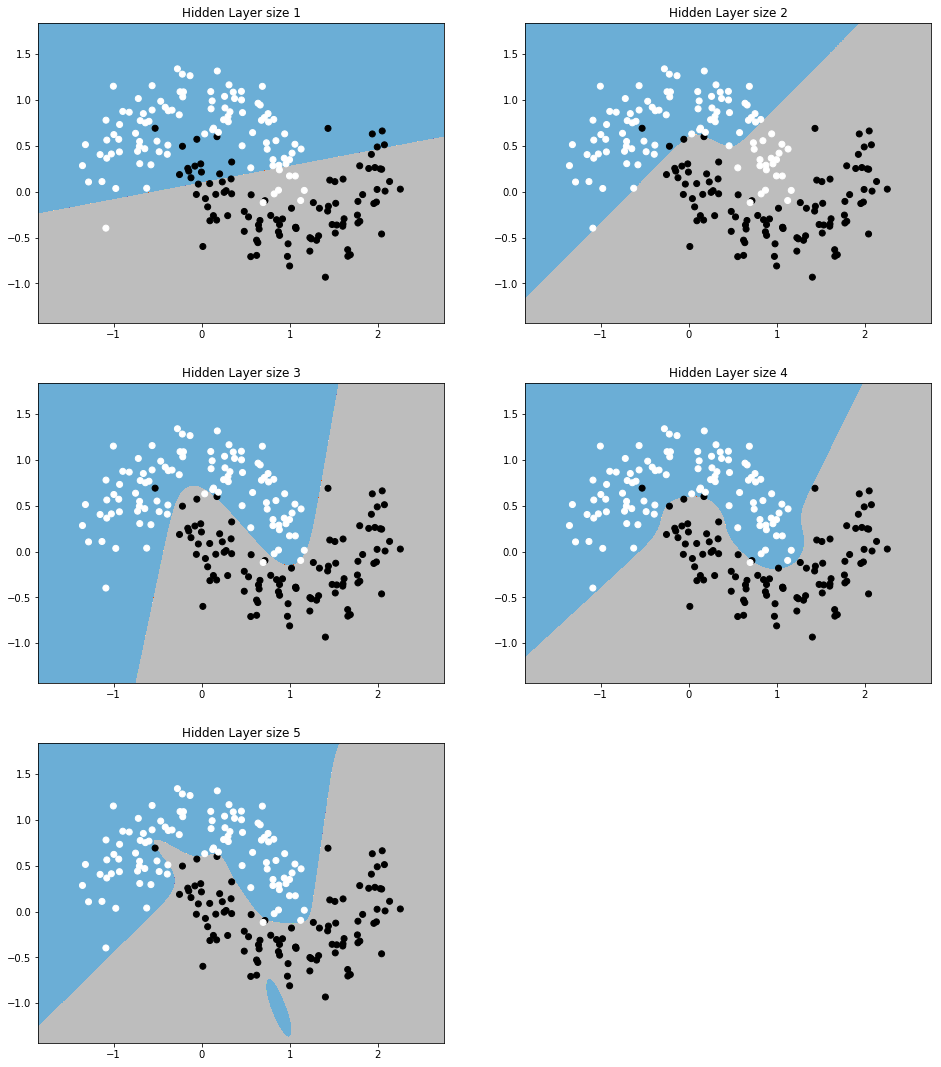

In [15]:
plt.figure(figsize=(16, 32))
hidden_layer_dimensions = [1, 2, 3, 4, 5]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer size %d' % nn_hdim)
    model = build_model(nn_hdim)
    plot_decision_boundary(lambda x: predict(model, x))
plt.show()